In [ ]:
'''
Udacity - ML Engineer Nanodegree Program
    Project - 1
    Titanic Survival Exploration

Talat Ozkan - 13 JAN 2018
talat.ozkan@turkcell.com.tr

Q1: Performance of the naive predictor (predictions_0)
Q2: Performance of the simple predictor (predictions_1)
Q3: Performance of the intermediate predictor (predictions_2)
Q4: Creating a complex predictor (predictions_3). A prediction accuracy of at least 80%
Q5: A scenario for performing supervised learning

'''


In [12]:
# Import Libraries
import numpy as np
import pandas as pd

# display() method for DataFrames
from IPython.display import display

# Supplementary visualizations visuals.py
# https://github.com/udacity/machine-learning/projects/titanic_survival_exploration/visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline


# Load data set
# https://github.com/udacity/machine-learning/projects/titanic_survival_exploration/titanic_data.csv
data_file = 'Data/titanic_data.csv'
full_data = pd.read_csv(data_file)

# type(full_data) # pandas.core.frame.DataFrame

# Print head of the data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# I'm interested in the outcome of survivals which will be my prediction targets
# Storing the column "Survived" in a new variable and removing it from the dataset
outcomes = full_data['Survived']

# type(outcomes) # pandas.core.series.Series

data = full_data.drop('Survived', axis = 1)

# New Data - Survived column is dropped
display(data.head())


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
'''
function accuracy_score(truth, pred):
    prints accuracy score
'''
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the function
predictions = pd.Series(np.ones(5, dtype = int))

# type(predictions) # pandas.core.series.Series

# print(np.ones(5, dtype = int)) # series of n ones

# Print predictions for first 5 passengers
# as we know from the full data, the result should be 60%
print(accuracy_score(outcomes[:5], predictions))

# Yes, it is!


Predictions have an accuracy of 60.00%.


In [51]:
'''
function predictions_0(data):
    Allways predicts that a passanger did not survive
'''
def predictions_0(data):
    
    predictions = []
    
    for _, passenger in data.iterrows():
        
        # predict that passanger did not survive (0)
        
        predictions.append(0)
    
    # return predictions
    return pd.Series(predictions)


# Make predictions
predictions = predictions_0(data)


### Question 1

* Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?


In [52]:
# Prediction accuracy from data which none of the passengers survived
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


### Answer 1

61.62%


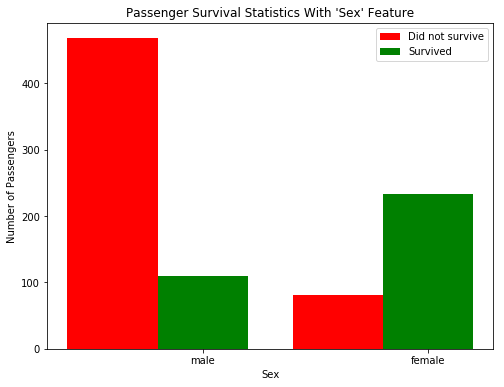

In [53]:
"""
Let's have a look whether the feature Sex has any indications
"""

# Plot the survival outcomes of passangers based on their sex
vs.survival_stats(data, outcomes, 'Sex')


In [55]:
'''
function predictions_1(data):
    Predict passengers survived if they are female
'''
def predictions_1(data):
    
    predictions = []
    
    for _, passenger in data.iterrows():

        # predict females as survived (1)
        if passenger['Sex'].lower() == "female":
            predictions.append(1)
        else:
            predictions.append(0)
        
    # return predictions
    return pd.Series(predictions)


# Make predictions
predictions = predictions_1(data)

### Question 2

* How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?

In [56]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


### Answer 2

78.68%


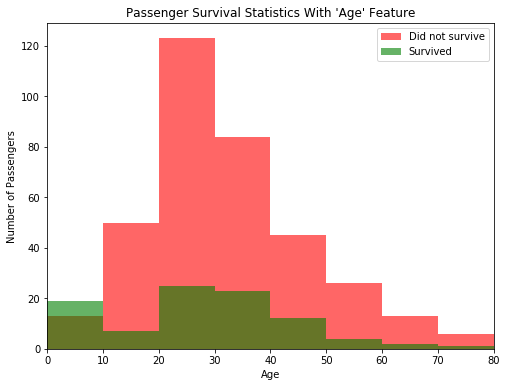

In [57]:
"""
Let's find a subset of passengers who had higher rate of survival
Let's look at age of each male
"""

vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [60]:
'''
function predictions_2(data):
    Predict passengers survived if they are female and male younger than 10
'''
def predictions_2(data):
    
    predictions = []
    
    for _, passenger in data.iterrows():

        # predict females as survived (1)
        if (passenger['Sex'].lower() == "female") or (passenger['Sex'].lower() == "male" and passenger['Age'] <= 10):
            predictions.append(1)
        else:
            predictions.append(0)
        
    # return predictions
    return pd.Series(predictions)


# Make predictions
predictions = predictions_2(data)

### Question 3

* How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?

In [61]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.24%.


### Answer 3

79.24%

In [62]:
"""
Let's find a better model
"""

display(full_data.head(100))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


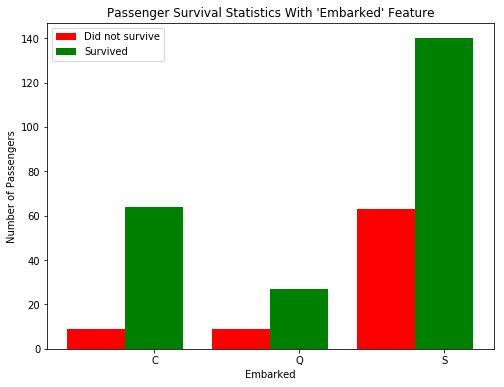

Passengers with missing 'Embarked' values: 2 (2 survived, 0 did not survive)


In [84]:
vs.survival_stats(data, outcomes, 'Embarked', ["Sex == 'female'"])

In [75]:
'''
function predictions_3(data):
    Predict passengers survived if they are female and male younger than 10
'''
def predictions_3(data):
    
    predictions = []
    
    for _, passenger in data.iterrows():

        # predict females as survived (1)
        if (passenger['Sex'].lower() == "female") or (passenger['Sex'].lower() == "male" and passenger['Age'] <= 10):
            predictions.append(1)
        else:
            predictions.append(0)
        
    # return predictions
    return pd.Series(predictions)


# Make predictions
predictions = predictions_3(data)

In [76]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.24%.
